# Analysis of Variance (ANOVA)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf   # <--- New package import!

sns.set_style('whitegrid')

## One-Way ANOVA

### Basic blue/orange example

In [2]:
blue = [1,3]
orange = [2,4]
total = blue + orange

In [3]:
dfbo = pd.DataFrame({'Color':['blue']*2+['orange']*2, 'Value': total})
dfbo

,Color,Value
0,blue,1
1,blue,3
2,orange,2
3,orange,4


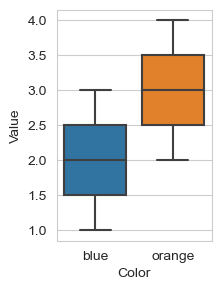

In [4]:
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(data=dfbo, x='Color', y='Value', ax=ax)
plt.show()


In [5]:
formula = 'Value ~ C(Color)'

In [6]:
model = smf.ols(formula=formula, data=dfbo).fit()

In [8]:
anova_table = sms.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Color),1.0,1.0,0.5,0.552786
Residual,4.0,2.0,NaN,NaN


In [9]:
def anova(model):
    import statsmodels.stats.api as sms
    at = sms.anova_lm(model, typ=2)
    at['mean_sq'] = at['sum_sq'] / at['df']
    at = at.reindex(['df','sum_sq','mean_sq','F','PR(>F)'],axis=1)
    return at

In [12]:
anova_table = anova(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Color),1.0,1.0,1.0,0.5,0.552786
Residual,2.0,4.0,2.0,NaN,NaN


In [13]:
anova_table.to_clipboard()

### Coughing Kids example

In [14]:
dm = [4,6,9,4,7,7,7,9,12,10,11,6,3,4,9,12,7,6,8,12,12,4,12,13,7,10,13,9,4,4,10,15,9]
honey = [12,11,15,11,10,13,10,4,15,16,9,14,10,6,10,8,11,12,12,8,12,9,11,15,10,1,9,13,8,12,10,8,9,5,12]
placebo = [5,8,6,1,0,8,12,8,7,7,1,6,7,7,12,7,9,7,9,5,11,9,5,6,8,8,6,7,10,9,4,8,7,3,1,4,3]

In [15]:
labels = ['dm'] * len(dm) + ['honey'] * len(honey) + ['placebo'] * len(placebo)

In [16]:
scores = pd.DataFrame({'treatment':labels, 'score':dm+honey+placebo})
scores

,treatment,score
0,dm,4
1,dm,6
2,dm,9
3,dm,4
4,dm,7
...,...,...
100,placebo,7
101,placebo,3
102,placebo,1
103,placebo,4


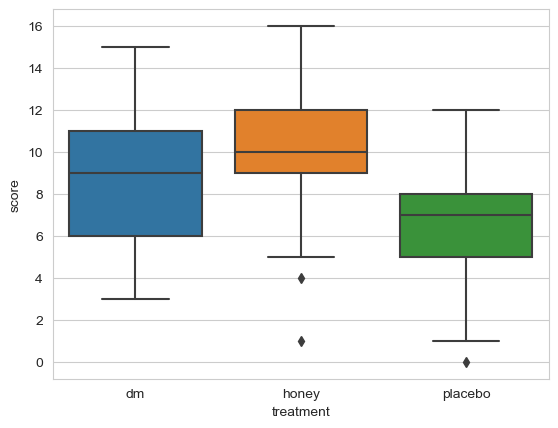

In [17]:
fig, ax = plt.subplots()
sns.boxplot(data=scores, x='treatment', y='score', ax=ax)
plt.show()

In [21]:
formula = 'score ~ C(treatment)'

In [22]:
model = smf.ols(formula, scores).fit()
anova(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,259.842471,129.921236,13.276934,0.000008
Residual,102.0,998.119434,9.785485,NaN,NaN


## Two-Way ANOVA

In [23]:
penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
penguins[['species', 'sex']].value_counts()

species    sex   
Adelie     Female    73
           Male      73
Gentoo     Male      61
           Female    58
Chinstrap  Female    34
           Male      34
dtype: int64

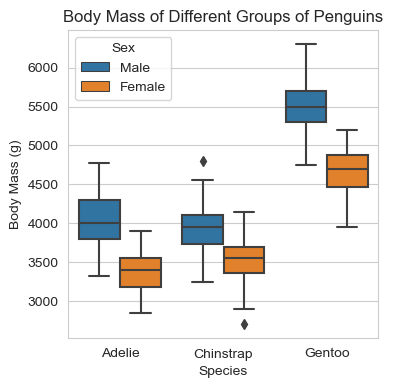

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='sex', ax=ax)
ax.legend(title='Sex')
ax.set_ylabel('Body Mass (g)')
ax.set_xlabel('Species')
ax.set_title('Body Mass of Different Groups of Penguins')
plt.show()

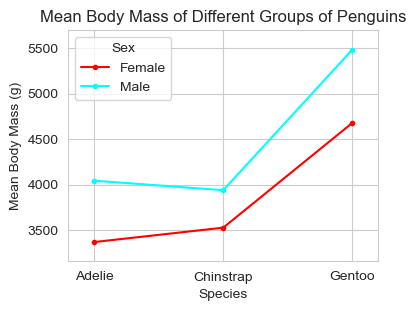

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
smg.interaction_plot(x=penguins['species'],
                     trace=penguins['sex'],
                     response=penguins['body_mass_g'],
                     ax=ax)
ax.legend(title='Sex')
ax.set_ylabel('Mean Body Mass (g)')
ax.set_xlabel('Species')
ax.set_title('Mean Body Mass of Different Groups of Penguins')
plt.show()

In [34]:
formula = 'body_mass_g ~ C(species) + C(sex) + C(species):C(sex)'

In [75]:
formula = 'body_mass_g ~ C(species) * C(sex)'

In [76]:
model = smf.ols(formula, data=penguins).fit()

In [77]:
anova_table = anova(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,1.434016e+08,7.170079e+07,749.015666,8.144406e-123
C(sex),1.0,3.709026e+07,3.709026e+07,387.459976,1.902273e-57
C(species):C(sex),2.0,1.676557e+06,8.382784e+05,8.756997,1.973489e-04
Residual,327.0,3.130263e+07,9.572669e+04,NaN,NaN


In [39]:
anova(model).to_clipboard()
# added total row in excel (near end of video)

In [78]:
total_df = anova_table[anova_table.index!='Residual']['df'].sum()
total_sum_sq = anova_table[anova_table.index!='Residual']['sum_sq'].sum()
total_mean_sq = total_sum_sq / total_df 
total_F = total_mean_sq / anova_table.loc['Residual']['mean_sq']
total_p = stats.f(dfn=total_df, dfd=anova_table.loc['Residual']['df']).sf(total_F)
total_row = pd.DataFrame({'df':total_df,'sum_sq':total_sum_sq,'mean_sq':total_mean_sq,'F':total_F, 'PR(>F)':total_p},index=['Treatment'])

anova_table = pd.concat([total_row,anova_table])

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Treatment,5.0,1.821684e+08,3.643368e+07,380.601061,6.019019e-134
C(species),2.0,1.434016e+08,7.170079e+07,749.015666,8.144406e-123
C(sex),1.0,3.709026e+07,3.709026e+07,387.459976,1.902273e-57
C(species):C(sex),2.0,1.676557e+06,8.382784e+05,8.756997,1.973489e-04
Residual,327.0,3.130263e+07,9.572669e+04,NaN,NaN


***
# Progress Check

In [41]:
ano = pd.read_csv('Anorexia.dat', sep='\s+')
ano

,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4
3,4,cb,82.6,81.9
4,5,cb,79.9,76.4
...,...,...,...,...
67,68,c,84.4,84.7
68,69,c,79.6,81.4
69,70,c,77.5,81.2
70,71,c,72.3,88.2


In [42]:
ano['change'] = ano['after'] - ano['before']

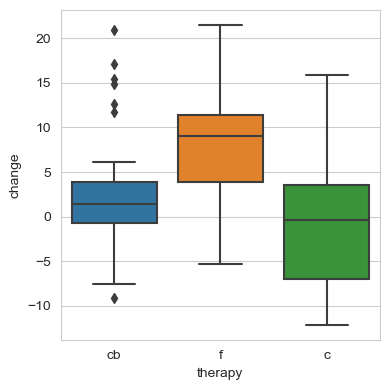

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data=ano, x='therapy', y='change',ax=ax)
fig.tight_layout()

In [45]:
formula = 'change ~ C(therapy)'
model = smf.ols(formula=formula, data=ano).fit()
anova(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(therapy),2.0,614.643667,307.321833,5.422297,0.006499
Residual,69.0,3910.742444,56.677427,NaN,NaN


In [46]:
fev = pd.read_csv('FEV-1.dat', sep='\s+')
fev

,Obs,patient,base,drug,hour,fev
0,1,1,2.46,A,1,2.68
1,2,2,3.50,A,1,3.95
2,3,3,1.96,A,1,2.28
3,4,4,3.44,A,1,4.08
4,5,5,2.80,A,1,4.09
...,...,...,...,...,...,...
571,572,68,3.50,P,8,3.61
572,573,69,2.86,P,8,2.89
573,574,70,2.42,P,8,3.75
574,575,71,3.66,P,8,3.74


In [47]:
fev['change'] = fev['fev'] - fev['base']

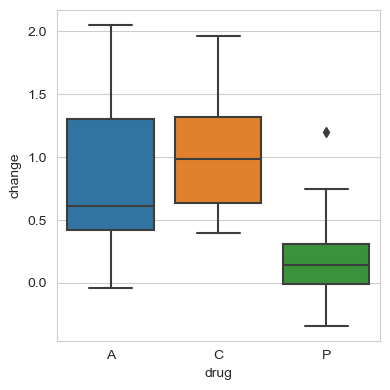

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data=fev[fev['hour']==1], x='drug', y='change',ax=ax)
fig.tight_layout()

In [80]:
formula = 'change ~ C(drug) * C(hour)'
model = smf.ols(formula, fev).fit()
anova_table = anova(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,24.719367,12.359684,45.942313,3.500758e-19
C(hour),7.0,17.170399,2.452914,9.117754,1.110746e-10
C(drug):C(hour),14.0,6.280066,0.448576,1.667407,5.849269e-02
Residual,552.0,148.502433,0.269026,NaN,NaN


In [53]:
anova_table.index

Index(['C(drug)', 'C(hour)', 'C(drug):C(hour)', 'Residual'], dtype='object')

In [81]:
total_df = anova_table[anova_table.index!='Residual']['df'].sum()
total_sum_sq = anova_table[anova_table.index!='Residual']['sum_sq'].sum()
total_mean_sq = total_sum_sq / total_df 
total_F = total_mean_sq / anova_table.loc['Residual']['mean_sq']
total_p = stats.f(dfn=total_df, dfd=anova_table.loc['Residual']['df']).sf(total_F)
total_row = pd.DataFrame({'df':total_df,'sum_sq':total_sum_sq,'mean_sq':total_mean_sq,'F':total_F, 'PR(>F)':total_p},index=['Treatment'])

In [82]:
anova_table = pd.concat([total_row,anova_table])

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Treatment,23.0,48.169833,2.094341,7.784896,4.085336e-22
C(drug),2.0,24.719367,12.359684,45.942313,3.500758e-19
C(hour),7.0,17.170399,2.452914,9.117754,1.110746e-10
C(drug):C(hour),14.0,6.280066,0.448576,1.667407,5.849269e-02
Residual,552.0,148.502433,0.269026,NaN,NaN


In [79]:
# one hour
formula = 'change ~ C(drug)'
model = smf.ols(formula, fev[fev['hour']==1]).fit()
anova_table = anova(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,9.625253,4.812626,21.184575,6.712809e-08
Residual,69.0,15.675142,0.227176,NaN,NaN


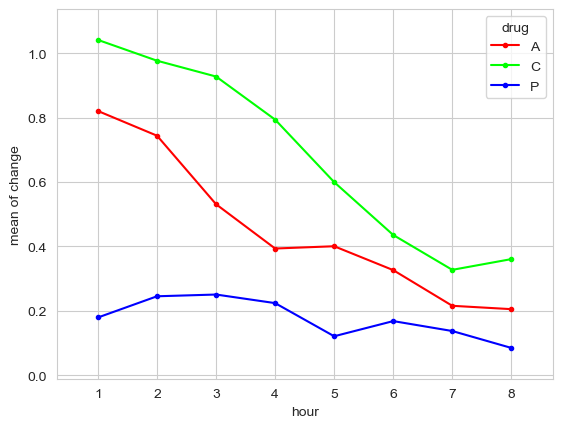

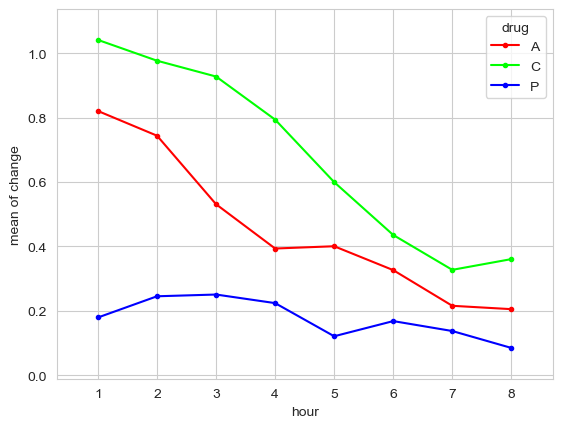

In [74]:
smg.interaction_plot(x=fev['hour'],trace=fev['drug'],response=fev['change'])

Wrong answers  

8. Mean Squared Error 
    my answer:  0.454
    correct:    0.2272

9. test statistic value
    my answer:  11.00
    correct:    21.1846

13. test statistic value for overall model
    my answer:  4.25
    correct:    7.78

* I realized I had 'fev' in the formula instead of 'change'